In [49]:
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')

### Analisis Preliminar

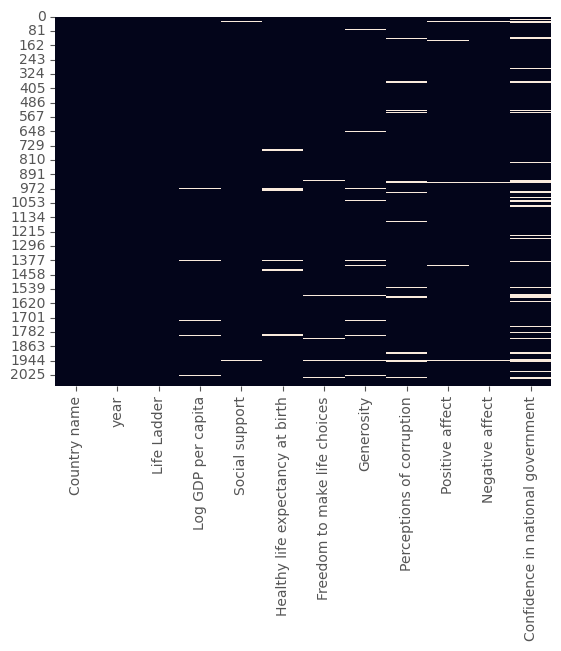

In [62]:
df = pd.read_excel("DataForTable2.1.xls")
df.isna().sum()
sns.heatmap(df.isnull(), cbar=False)

df_elim = df.drop(['Life Ladder', 'year'], axis=1).dropna()
X = df.drop(['Life Ladder', 'year', 'Country name'], axis=1)
X_elim = df.drop(['Life Ladder', 'year', 'Country name'], axis=1).dropna()

X_elim = pd.DataFrame(StandardScaler().fit_transform(X_elim), columns=X_elim.columns) 

imputer = KNNImputer(n_neighbors=5, weights="uniform")

imputer.fit(X) 
df_imput = df.drop(['Life Ladder', 'year'], axis=1)
X_imput = pd.DataFrame(imputer.transform(X), columns=X.columns)
X_imput = pd.DataFrame(StandardScaler().fit_transform(X_imput), columns= X_imput.columns) 


In [25]:
len(df_imput)

2089

In [17]:
import plotly.express as px

def Plot2D(X, y, plot_name):
    
    fig = px.scatter(None, x = X[:,0], y = X[:,1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=y)

    fig.update_layout(dict(plot_bgcolor = 'white'))

    fig.update_xaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey', 
                     zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey', 
                     showline = True, linewidth = 1, linecolor = 'black')

    fig.update_yaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey', 
                     zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey', 
                     showline = True, linewidth = 1, linecolor = 'black')

    fig.update_layout(title_text = plot_name)

    fig.update_traces(marker = dict(size = 5,
                        line = dict(color = 'black', width = 0.3)))
    
    return fig


def Plot3D(X, y, plot_name):
    fig = px.scatter_3d(None, 
                        x=X[:,0], y=X[:,1], z=X[:,2],
                        color=y,
                        height=800, width=800
                       )

    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
                                             
    fig.update_traces(marker=dict(size=3, 
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig

In [33]:
from sklearn.manifold import LocallyLinearEmbedding as lle

def run_lle(X, n_comp, n_neighbors):
    embed_lle = lle(n_neighbors = n_neighbors,
                    n_components = n_comp,  
                    reg = 0.001, 
                    eigen_solver = 'auto',
                    method= 'standard', 
                    neighbors_algorithm ='auto', 
                    n_jobs = 4 
                   )

    result = embed_lle.fit_transform(X)

    return result

lle2comp = run_lle(X_elim, 2, 30)
lle3comp = run_lle(X_elim, 3, 30)


In [34]:
Plot2D(lle2comp, df_elim['Country name'], 'LLE de 2 dimensiones')

In [36]:
Plot3D(lle3comp, df_elim['Country name'], 'LLE de 3 dimensiones')

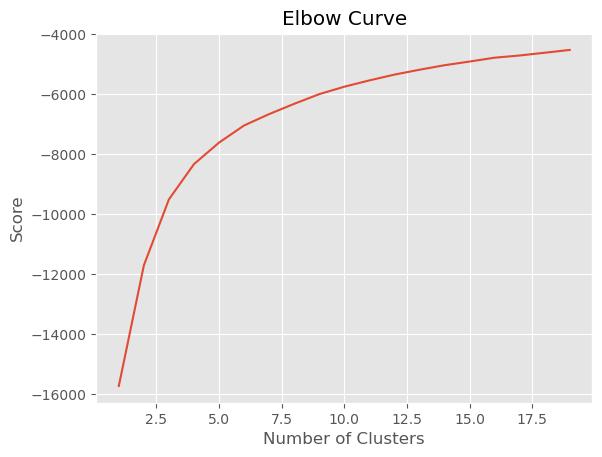

In [39]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_elim).score(X_elim) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score') 
plt.title('Elbow Curve')
plt.show()

### Agrupamiento 

In [40]:
kmeans = KMeans(n_clusters=2).fit(X_elim)
labels = kmeans.predict(X_elim)
 
Plot3D(lle3comp, labels, 'Agrupamiento con LLE')

In [41]:
X_elim['labels'] = labels

C:\Users\Tosin\AppData\Local\Temp\ipykernel_12368\291802744.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Tosin\AppData\Local\Temp\ipykernel_12368\291802744.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

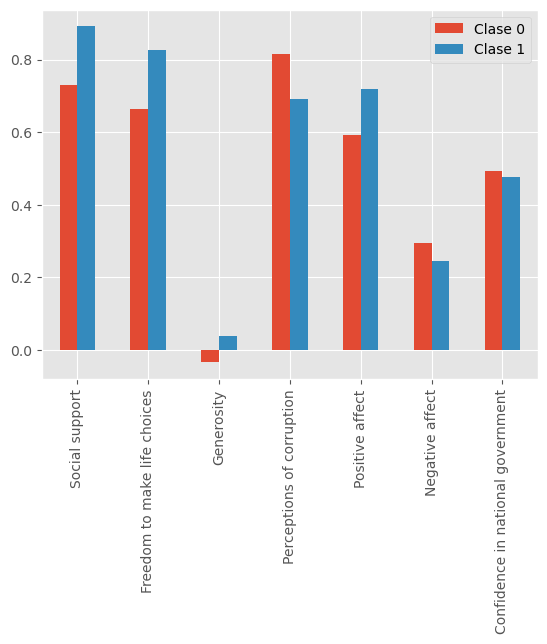

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

df_elim['labels'] = labels

df_elim_0 = df_elim[df_elim['labels'] == 0]
df_elim_1 = df_elim[df_elim['labels'] == 1]

mean = pd.DataFrame(df_elim_0.drop(['labels', 'Healthy life expectancy at birth', 'Log GDP per capita'], axis = 1).mean(), columns = ["Clase 0"])
mean['Clase 1'] = pd.DataFrame(df_elim_1.drop(['labels', 'Healthy life expectancy at birth', 'Log GDP per capita'], axis = 1).mean(), columns = ["Clase 1"])

mean.plot(kind = 'bar')

<AxesSubplot:>

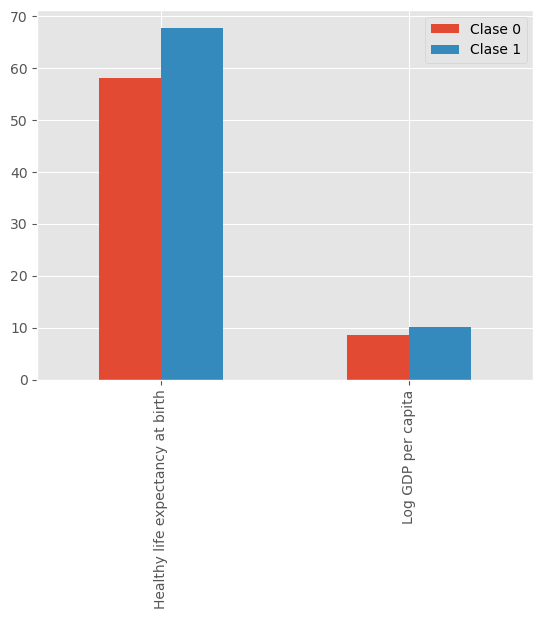

In [43]:
mean = pd.DataFrame(df_elim_0[['Healthy life expectancy at birth', 'Log GDP per capita']].mean(), columns = ["Clase 0"])
mean['Clase 1'] = pd.DataFrame(df_elim_1[['Healthy life expectancy at birth', 'Log GDP per capita']].mean(), columns = ["Clase 1"])

mean.plot(kind = 'bar')

### Analis de los datso Imputados

In [15]:
from sklearn.manifold import LocallyLinearEmbedding as lle
from sklearn.decomposition import PCA

embed_pca_2d = PCA(n_components=2)
embed_pca_3d = PCA(n_components=3)
    
pca2comp = embed_pca_2d.fit_transform(X_imput)
pca3comp = embed_pca_3d.fit_transform(X_imput)    


In [45]:
Plot2D(pca2comp, df_imput, 'LLE de 2 dimensiones')

In [30]:
Plot3D(pca3comp, df_imput, 'LLE de 2 dimensiones')

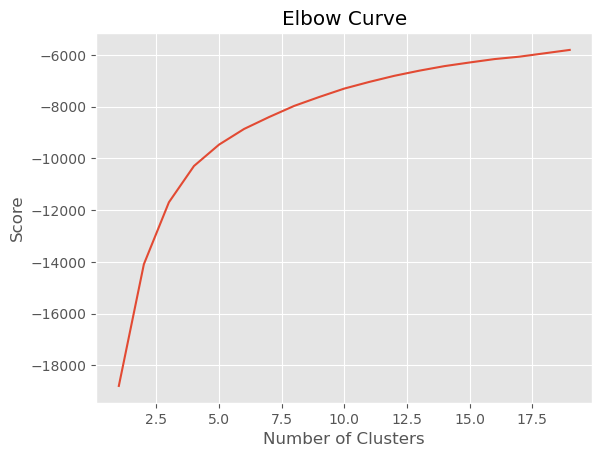

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_imput).score(X_imput) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score') 
plt.title('Elbow Curve')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3).fit(X_imput)
labels = kmeans.predict(X_imput)
 
Plot3D(pca3comp, labels, 'Agrupamiento con LLE')

C:\Users\Tosin\AppData\Local\Temp\ipykernel_1960\2830034588.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Tosin\AppData\Local\Temp\ipykernel_1960\2830034588.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Tosin\AppData\Local\Temp\ipykernel_1960\2830034588.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

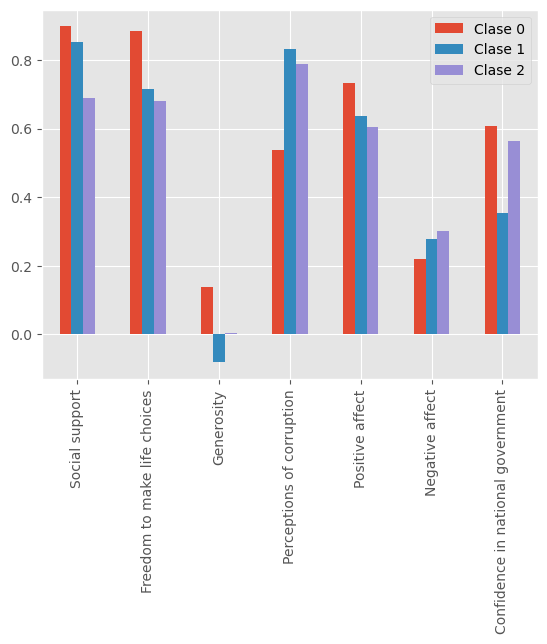

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

df_imput['labels'] = pd.DataFrame(labels) 

df_imput_0 = df_imput[df_imput['labels'] == 0]
df_imput_1 = df_imput[df_imput['labels'] == 1]
df_imput_2 = df_imput[df_imput['labels'] == 2]

mean = pd.DataFrame(df_imput_0.drop(['labels', 'Healthy life expectancy at birth', 'Log GDP per capita'], axis = 1).mean(), columns = ["Clase 0"])
mean['Clase 1'] = pd.DataFrame(df_imput_1.drop(['labels', 'Healthy life expectancy at birth', 'Log GDP per capita'], axis = 1).mean(), columns = ["Clase 1"])
mean['Clase 2'] = pd.DataFrame(df_imput_2.drop(['labels', 'Healthy life expectancy at birth', 'Log GDP per capita'], axis = 1).mean(), columns = ["Clase 2"])

mean.plot(kind = 'bar')

<AxesSubplot:>

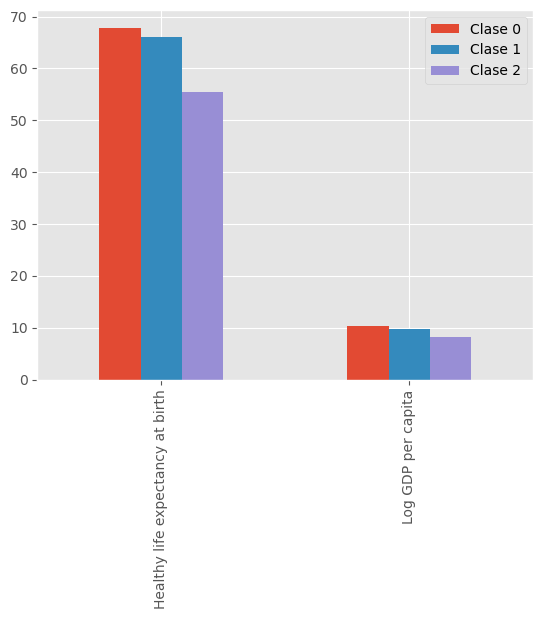

In [65]:
mean = pd.DataFrame(df_imput_0[['Healthy life expectancy at birth', 'Log GDP per capita']].mean(), columns = ["Clase 0"])
mean['Clase 1'] = pd.DataFrame(df_imput_1[['Healthy life expectancy at birth', 'Log GDP per capita']].mean(), columns = ["Clase 1"])
mean['Clase 2'] = pd.DataFrame(df_imput_2[['Healthy life expectancy at birth', 'Log GDP per capita']].mean(), columns = ["Clase 2"])


mean.plot(kind = 'bar')